# The Impact of Economic, Society, Health Care and Law on Tobacco Consumption

This study aimed to investigate the impact of different parameters on tobacco consumption in different countries. These parameters are generally categorized into:

- Economic: we considered Tax and affordability.
    - Tax on tabacco usage 
    - Affordability: which covers GDP intrinsically
- Society: we considered happiness as the indicator of social situation for different country.
- Health Care: we also included the score of health warn in this pupose.
- Law: we cosidered three different bans on cigarette advertising and ban on smoking in some enclosed public places. 


** This study is based on gathered data for the year 2015.

** All data sets are from WHO reports, except happiness score which is found from a Kaggle research.

** Domain study is based on WHO reports.

*** Links for data source and domain study will be included later.

*** Explanation about data will be covered later.

### Import libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set()

### Read File

In [56]:
# Read the complete cleaned data that contains all parameters extracted from domain study. 
data = pd.read_csv('data/tobacco_data.csv')
data.head()

,Country,Year,Tobac_Use_M,Tobac_Use_F,Tax_2015,Happiness_Score,Afford_2015,Ban_Score_Dir_Ads,Ban_Score_Indr_Ads,Ban_Score_add_indir_ads,Warn_Score,Ban_Score_places
0,Albania,2015,51.2,7.6,65.195,4.959,3.920,8,8,3,50.0,8
1,Argentina,2015,29.5,18.4,75.045,6.574,1.310,7,10,5,50.0,8
2,Armenia,2015,52.3,1.5,34.165,4.350,3.945,5,2,0,50.0,3
3,Australia,2015,16.7,13.1,58.515,7.284,2.285,6,2,0,83.0,6
4,Austria,2015,35.5,34.8,74.835,7.200,1.225,7,8,5,65.0,2


In [57]:
data.describe()

,Year,Tobac_Use_M,Tobac_Use_F,Tax_2015,Happiness_Score,Afford_2015,Ban_Score_Dir_Ads,Ban_Score_Indr_Ads,Ban_Score_add_indir_ads,Warn_Score,Ban_Score_places
count,103.0,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,2015.0,33.366990,11.729126,55.865243,5.586816,4.549126,6.330097,5.563107,3.058252,55.779150,4.543689
std,0.0,12.935514,10.371725,22.005910,1.118552,4.340402,2.202442,3.126954,2.428690,14.703264,3.031782
min,2015.0,8.900000,0.200000,7.580000,3.340000,0.550000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,2015.0,22.750000,2.700000,36.255000,4.683500,1.770000,6.000000,3.000000,1.000000,50.000000,1.000000
50%,2015.0,31.500000,8.300000,62.000000,5.360000,2.760000,7.000000,6.000000,3.000000,55.000000,5.000000
75%,2015.0,43.000000,19.700000,75.217500,6.539500,4.815000,8.000000,8.000000,5.000000,65.000000,8.000000
max,2015.0,76.200000,39.700000,85.990000,7.587000,19.600000,8.000000,10.000000,7.000000,90.000000,8.000000


In [58]:
# Drop year
data.drop(['Year', 'Country'], axis=1, inplace=True)

### Distributions

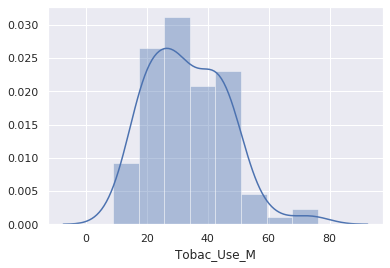

In [59]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(data['Tobac_Use_M'])

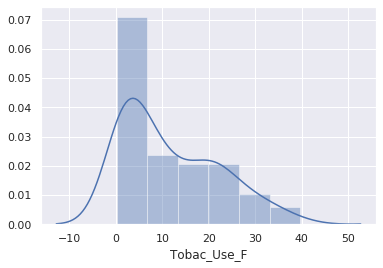

In [60]:
sns.distplot(data['Tobac_Use_F'])

### Dealing with outliers

In [61]:
# Obviously there are some outliers present 

# Without diving too deep into the topic, we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# Here, the outliers are situated around the higher prices (right side of the graph)
# Logic should also be applied
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price

# Outliers are a great issue for OLS, thus we must deal with them in some way
# It may be a useful exercise to try training a model without removing the outliers

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
# q = data['Tobac_Use_F'].quantile(0.01)
# # Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
# data_1 = data[data['Tobac_Use_F']>q]
# # In this way we have essentially removed the top 1% of the data about 'Price'
# sns.distplot(data_1['Tobac_Use_F'])
# data_1.describe()

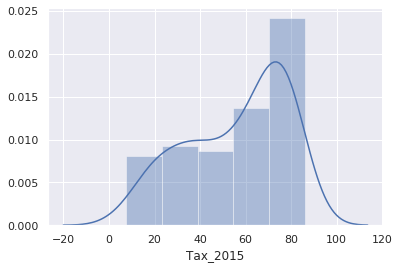

In [62]:
sns.distplot(data['Tax_2015'])

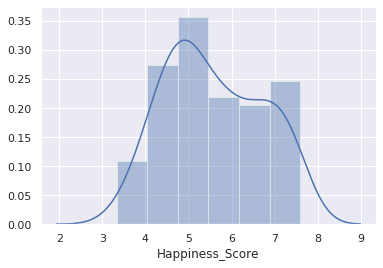

In [63]:
sns.distplot(data['Happiness_Score'])

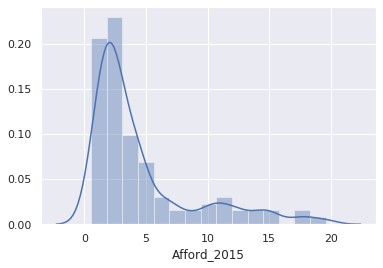

In [64]:
sns.distplot(data['Afford_2015'])

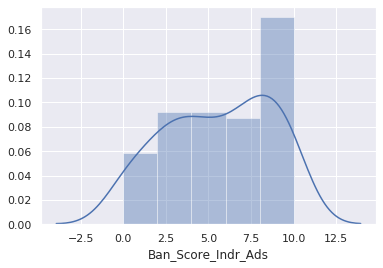

In [65]:
sns.distplot(data['Ban_Score_Indr_Ads'])

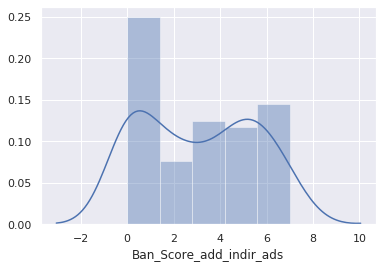

In [66]:
sns.distplot(data['Ban_Score_add_indir_ads'])

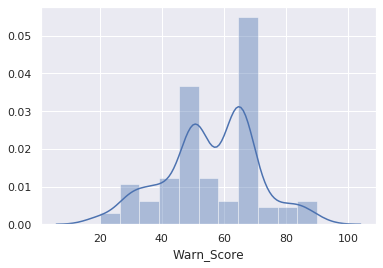

In [67]:
sns.distplot(data['Warn_Score'])

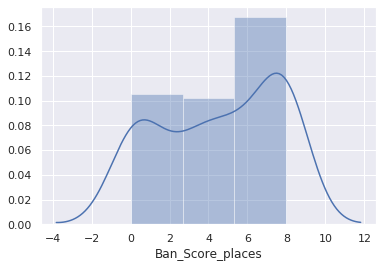

In [68]:
sns.distplot(data['Ban_Score_places'])

## Checking the OLS assumptions

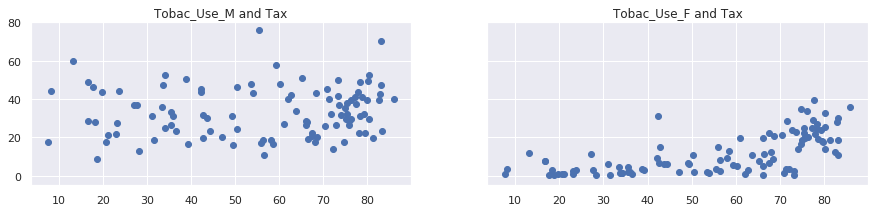

In [69]:
# Here we decided to use some matplotlib code, without explaining it
# You can simply use plt.scatter() for each of them (with your current knowledge)
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data['Tax_2015'],data['Tobac_Use_M'])
ax1.set_title('Tobac_Use_M and Tax')
ax2.scatter(data['Tax_2015'],data['Tobac_Use_F'])
ax2.set_title('Tobac_Use_F and Tax')

plt.show()

### Multicollinearity

In [70]:
# Let's quickly see the columns of our data frame
data.columns.values

array(['Tobac_Use_M', 'Tobac_Use_F', 'Tax_2015', 'Happiness_Score',
       'Afford_2015', 'Ban_Score_Dir_Ads', 'Ban_Score_Indr_Ads',
       'Ban_Score_add_indir_ads', 'Warn_Score', 'Ban_Score_places'],
      dtype=object)

In [71]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data[['Tax_2015',
        'Afford_2015', 
       ]]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [72]:
# Let's explore the result
vif

,VIF,Features
0,1.439871,Tax_2015
1,1.439871,Afford_2015


Candidates to remove: Tax_2015, Happiness_Score, Ban_Score_Dir_Ads, Ban_Score_Indr_Ads, Warn_Score

## Linear regression model

### Declare the inputs and the targets

In [73]:
# The inputs are everything BUT the dependent variable, so we can simply drop it
# inputs = data_scaled.drop(['Tobac_Use_M', 'Tobac_Use_F'],axis=1)
targets_f = data['Tobac_Use_F']
targets_m = data['Tobac_Use_M']
inputs = data.drop(['Tobac_Use_F', 'Tobac_Use_M'], axis=1)

### Scale the data

In [74]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [77]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)
# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 42
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets_f, test_size=0.2, random_state=42)

## Investigation for Male
### Train Test Split

In [78]:
# Import the module for the split
from sklearn.model_selection import train_test_split




def reg_function(target, inputs):
    
    # Create a scaler object
    scaler = StandardScaler()
    # Fit the inputs (calculate the mean and standard deviation feature-wise)
    scaler.fit(inputs)
    
    # Scale the features and store them in a new variable (the actual scaling procedure)
    inputs_scaled = scaler.transform(inputs)
    
    # Split the variables with an 80-20 split and some random state
    # To have the same split as mine, use random_state = 42
    x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=42)
    
    
    # Create a linear regression object
    reg = LinearRegression(intercept=False)
    # Fit the regression with the scaled TRAIN inputs and targets
    reg.fit(x_train,y_train)
    
    # Let's check the outputs of the regression
    # I'll store them in y_hat as this is the 'theoretical' name of the predictions
    y_hat = reg.predict(x_train)
    
    # The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
    # The closer the points to the 45-degree line, the better the prediction
    plt.scatter(y_train, y_hat)
    # Let's also name the axes
    plt.xlabel('Targets (y_train)',size=18)
    plt.ylabel('Predictions (y_hat)',size=18)
    # Sometimes the plot will have different scales of the x-axis and the y-axis
    # This is an issue as we won't be able to interpret the '45-degree line'
    # We want the x-axis and the y-axis to be the same
    # plt.xlim(6,13)
    # plt.ylim(6,13)
    plt.show()
    
    # Another useful check of our model is a residual plot
    # We can plot the PDF of the residuals and check for anomalies
    sns.distplot(y_train - y_hat)

    # Include a title
    plt.title("Residuals PDF", size=18)

    # In the best case scenario this plot should be normally distributed
    # In our case we notice that there are many negative residuals (far away from the mean)
    # Given the definition of the residuals (y_train - y_hat), negative values imply
    # that y_hat (predictions) are much higher than y_train (the targets)
    # This is food for thought to improve our model
    
    
    # Find the R-squared of the model
    r_score = reg.score(x_train,y_train)

    # Note that this is NOT the adjusted R-squared
    # in other words... find the Adjusted R-squared to have the appropriate measure :)
    
    print('R score is: ', r_score)
    
    # Obtain the bias (intercept) of the regression
    print('Intercepts are: ', reg.intercept_)
    
    
    # Create a regression summary where we can compare them with one-another
    reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
    reg_summary['Weights'] = reg.coef_
    reg_summary
    
    
    
    
    # Once we have trained and fine-tuned our model, we can proceed to testing it
    # Testing is done on a dataset that the algorithm has never seen
    # Luckily we have prepared such a dataset
    # Our test inputs are 'x_test', while the outputs: 'y_test' 
    # We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
    # If the predictions are far off, we will know that our model overfitted
    y_hat_test = reg.predict(x_test)
    
    # Create a scatter plot with the test targets and the test predictions
    # You can include the argument 'alpha' which will introduce opacity to the graph
    plt.scatter(y_test, y_hat_test, alpha=0.2)
    plt.xlabel('Targets (y_test)',size=18)
    plt.ylabel('Predictions (y_hat_test)',size=18)
    # plt.xlim(6,13)
    # plt.ylim(6,13)
    plt.show()
    
    
    # Finally, let's manually check these predictions
    # To obtain the actual prices, we take the exponential of the log_price
    df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
    df_pf.head()
    
    
    # After displaying y_test, we find what the issue is
    # The old indexes are preserved (recall earlier in that code we made a note on that)
    # The code was: data_cleaned = data_4.reset_index(drop=True)

    # Therefore, to get a proper result, we must reset the index and drop the old indexing
    y_test = y_test.reset_index(drop=True)

    # Check the result
    y_test.head()
    
    
    # Let's overwrite the 'Target' column with the appropriate values
    # Again, we need the exponential of the test log price
    df_pf['Target'] = y_test
    
    # Additionally, we can calculate the difference between the targets and the predictions
    # Note that this is actually the residual (we already plotted the residuals)
    df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

    # Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
    # this comparison makes a lot of sense
    
    # Finally, it makes sense to see how far off we are from the result percentage-wise
    # Here, we take the absolute difference in %, so we can easily order the data frame
    df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
    print('df_pf is as: ', df_pf)
    
    # Sometimes it is useful to check these outputs manually
    # To see all rows, we use the relevant pandas syntax
    pd.options.display.max_rows = 999
    # Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    # Finally, we sort by difference in % and manually check the model
    df_pf.sort_values(by=['Difference%'])
        
    return

### Create the regression

In [79]:
reg_function(targets_f, inputs)

TypeError: __init__() got an unexpected keyword argument 'intercept'

In [84]:
# Create a linear regression object
reg = LinearRegression()
reg.fit(targets_f, inputs)

ValueError: Expected 2D array, got 1D array instead:
array=[ 7.6 18.4  1.5 13.1 34.8  0.4  7.6  0.7 10.6 20.   1.  30.  11.3 28.2
  4.5  2.8  0.9 12.2 36.   1.8  6.2  6.   8.3 33.5 29.  16.4  9.4  3.3
  0.3 24.9  0.5 18.5 25.6  5.7 28.3  0.4 32.7  2.1 24.8 15.1  1.9  3.6
  0.7 21.9 19.3 19.7  5.9 10.6 10.7  9.3  2.1  3.6 24.3 31.   2.4 22.2
 21.4  1.4  3.2 20.2  3.7  3.3  6.6  5.3  1.4  5.9  6.4 11.1 23.9  0.2
  1.1 22.1  1.   3.   2.6  7.9  8.5 23.7 13.7 22.7  2.9  0.7 39.7 12.
  5.  17.6 18.1  6.5 27.1  0.4 20.8 19.7  2.3 12.4  2.9 14.  18.4 15.
 19.4  1.3  1.3  4.6  2.1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [82]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [28]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
# plt.xlim(6,13)
# plt.ylim(6,13)
plt.show()

NameError: name 'y_train' is not defined

In [4]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

NameError: name 'sns' is not defined

In [5]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

NameError: name 'reg' is not defined

### Finding the weights and bias

In [144]:
# Obtain the bias (intercept) of the regression
reg.intercept_

32.32845101020163

In [145]:
# Obtain the weights (coefficients) of the regression
reg.coef_

# Note that they are barely interpretable if at all

array([  3.77901387, -10.28041641,  -6.98905379,  -0.55981775,
         0.42495834,  -2.36788393,  -2.13335524,  -0.67807947])

In [146]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Tax_2015,3.78
1,Happiness_Score,-10.28
2,Afford_2015,-6.99
3,Ban_Score_Dir_Ads,-0.56
4,Ban_Score_Indr_Ads,0.42
5,Ban_Score_add_indir_ads,-2.37
6,Warn_Score,-2.13
7,Ban_Score_places,-0.68


## Testing

In [147]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

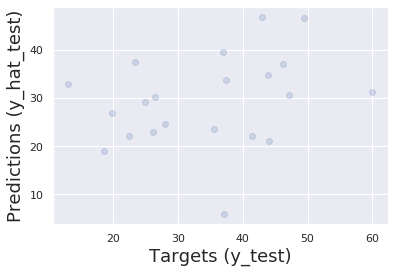

In [148]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
# plt.xlim(6,13)
# plt.ylim(6,13)
plt.show()

In [149]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,24.65
1,29.20
2,5.87
3,34.68
4,18.98


In [150]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0   28.00
1   24.90
2   37.10
3   43.90
4   18.60
Name: Tobac_Use_M, dtype: float64

In [151]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = y_test
df_pf

,Prediction,Target
0,24.65,28.00
1,29.20,24.90
2,5.87,37.10
3,34.68,43.90
4,18.98,18.60
5,31.23,60.00
6,30.51,47.10
7,37.08,46.20
8,32.85,13.10
9,22.91,26.20


In [152]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [153]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,24.65,28.00,3.35,11.98
1,29.20,24.90,-4.30,17.27
2,5.87,37.10,31.23,84.18
3,34.68,43.90,9.22,21.00
4,18.98,18.60,-0.38,2.03
5,31.23,60.00,28.77,47.95
6,30.51,47.10,16.59,35.21
7,37.08,46.20,9.12,19.74
8,32.85,13.10,-19.75,150.80
9,22.91,26.20,3.29,12.56


In [154]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,21.00,21.00,21.00,21.00
mean,29.43,34.52,5.09,32.26
std,9.58,12.14,13.19,34.87
min,5.87,13.10,-19.75,1.43
25%,22.91,24.90,-3.66,9.79
50%,30.16,36.90,3.29,19.74
75%,34.68,43.90,11.93,46.70
max,46.86,60.00,31.23,150.80


In [155]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
11,22.08,22.40,0.32,1.43
4,18.98,18.60,-0.38,2.03
10,46.61,49.40,2.79,5.66
13,39.46,36.90,-2.56,6.95
14,46.86,43.00,-3.86,8.99
12,33.74,37.40,3.66,9.79
0,24.65,28.00,3.35,11.98
9,22.91,26.20,3.29,12.56
18,30.16,26.50,-3.66,13.80
1,29.20,24.90,-4.30,17.27
